<a href="https://colab.research.google.com/github/ValentinBarco/Aprendizaje-de-maquina/blob/master/Proyecto_Fina%3B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


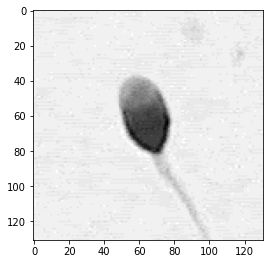

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img_normal     = cv2.imread('/content/drive/MyDrive/Colab Notebooks/HuSHem/01_Normal/image_001.BMP',0)
plt.figure(figsize=(14,14))
plt.subplot(1,3,2)
plt.imshow(img_normal,cmap='gray')
plt.subplot(1,3,2)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.transform import resize

Normal = '/content/drive/MyDrive/Colab Notebooks/HuSHem/01_Normal' 
Normal_Training = []


for img in os.listdir(Normal):
  img = cv2.imread(os.path.join(Normal,img))
  img = cv2.resize(img,(256,128),interpolation=cv2.INTER_AREA)
  fd = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), multichannel=True) 
  fd = fd/fd.max()
  Normal_Training.append(fd)

In [ ]:
Tapered = '/content/drive/MyDrive/Colab Notebooks/HuSHem/02_Tapered' 
Tapered_Training = []


for img in os.listdir(Tapered):
  img = cv2.imread(os.path.join(Tapered,img))
  img = cv2.resize(img,(256,128),interpolation=cv2.INTER_AREA)
  fd = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), multichannel=True) 
  fd = fd/fd.max()
  Tapered_Training.append(fd)

In [ ]:
Pyriform = '/content/drive/MyDrive/Colab Notebooks/HuSHem/03_Pyriform' 
Pyriform_Training = []


for img in os.listdir(Pyriform):
  img = cv2.imread(os.path.join(Pyriform,img))
  img = cv2.resize(img,(256,128),interpolation=cv2.INTER_AREA)
  fd = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), multichannel=True) 
  fd = fd/fd.max()
  Pyriform_Training.append(fd)

In [ ]:
Amorphous = '/content/drive/MyDrive/Colab Notebooks/HuSHem/04_Amorphous' 
Amorphous_Training = []


for img in os.listdir(Amorphous):
  img = cv2.imread(os.path.join(Amorphous,img))
  img = cv2.resize(img,(256,128),interpolation=cv2.INTER_AREA)
  fd = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), multichannel=True) 
  fd = fd/fd.max()
  Amorphous_Training.append(fd)

In [ ]:
import pandas as pd

Data_Normal = pd.DataFrame(Normal_Training)
target_Normal = pd.DataFrame([1]*len(Data_Normal))
Data_Tapered = pd.DataFrame(Tapered_Training)
target_Tapered = pd.DataFrame([2]*len(Data_Tapered))
Data_Pyriform = pd.DataFrame(Pyriform_Training)
target_Pyriform =pd.DataFrame([3]*len(Data_Pyriform))
Data_Amorphous = pd.DataFrame(Amorphous_Training)
target_Amorphous =pd.DataFrame([4]*len(Data_Amorphous))

Dataset = pd.concat([Data_Normal , Data_Tapered, Data_Pyriform, Data_Amorphous],ignore_index= True,axis=0)
target = pd.concat([target_Normal, target_Tapered , target_Pyriform, target_Amorphous],ignore_index= True,axis=0)

target.head

<bound method NDFrame.head of      0
0    1
1    1
2    1
3    1
4    1
..  ..
211  4
212  4
213  4
214  4
215  4

[216 rows x 1 columns]>

In [56]:
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Dataset, target, test_size=0.2, random_state=0)

Kvecinos = neighbors.KNeighborsClassifier(n_neighbors=3)
Kvecinos.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#Matiz de Confusion

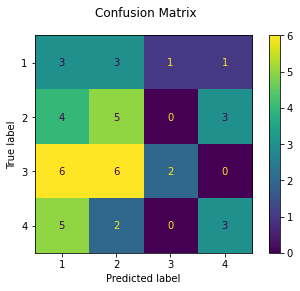

In [57]:
disp = metrics.plot_confusion_matrix(Kvecinos, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix");

#Calculo de n_vecinos para mayor presicion

In [58]:
for n in range(1,10):
  Kvecinos = neighbors.KNeighborsClassifier(n_neighbors=n)
  Kvecinos.fit(X_train, y_train)
  Score = Kvecinos.score(X_train, y_train)
  print("La Presicion del Modelo con " + str(n) + " vecinos es:",Score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La Presicion del Modelo con 1 vecinos es: 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La Presicion del Modelo con 2 vecinos es: 0.627906976744186


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La Presicion del Modelo con 3 vecinos es: 0.686046511627907


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La Presicion del Modelo con 4 vecinos es: 0.5930232558139535


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La Presicion del Modelo con 5 vecinos es: 0.5348837209302325


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La Presicion del Modelo con 6 vecinos es: 0.5174418604651163


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La Presicion del Modelo con 7 vecinos es: 0.5697674418604651


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La Presicion del Modelo con 8 vecinos es: 0.563953488372093


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


La Presicion del Modelo con 9 vecinos es: 0.5348837209302325


#Validacion Cruzada

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

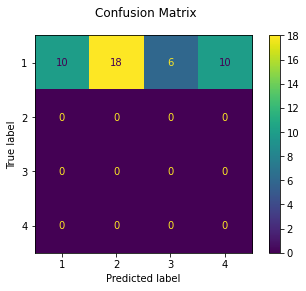

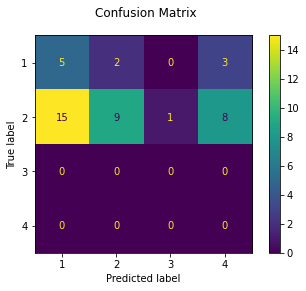

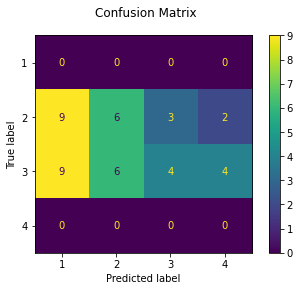

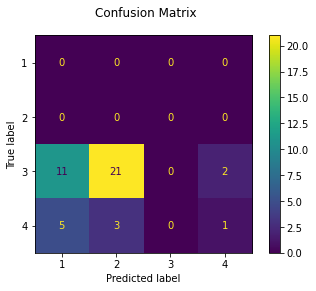

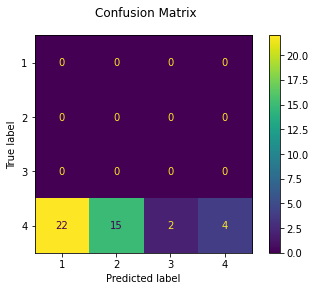

In [63]:
import numpy as np
from sklearn.model_selection import KFold

X = Dataset.values
y = target.values
kf = KFold(n_splits=5)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  Kvecinos = neighbors.KNeighborsClassifier(n_neighbors=3)
  Kvecinos.fit(X_train, y_train)
  disp = metrics.plot_confusion_matrix(Kvecinos, X_test, y_test)
  disp.figure_.suptitle("Confusion Matrix")